
# 📘 Chapter 4: Training Models

This chapter explains **how machine learning models are trained**: the objective they optimize, common loss functions, the role of regularization, and the basics of optimization with gradient descent. The presentation follows a third-person textbook style with clear LaTeX and runnable examples.



## 4.1 Empirical Risk Minimization (ERM)

In supervised learning, a model with parameters $(\theta$) (for example, weights and biases) is chosen to **minimize an average loss** over the training data. Given a dataset
$$

D = \{(x^{(i)}, y^{(i)})\}_{i=1}^n,

$$
and a loss function $(\ell(\cdot,\cdot)$), the **empirical risk** (training objective) is
$$

\mathcal{L}(\theta) \;=\; \frac{1}{n} \sum_{i=1}^{n} \ell\!\big(h_\theta(x^{(i)}),\, y^{(i)}\big).

$$
Training seeks parameters $(\theta^\star$) that minimize $(\mathcal{L}(\theta)$).



## 4.2 Common Loss Functions

### (a) Regression losses
- **Mean Squared Error (MSE)**  
  $$

  \ell_{\text{MSE}}(\hat{y}, y) \;=\; \frac{1}{m}\sum_{j=1}^{m} \big(\hat{y}_j - y_j\big)^2.
  
$$
- **Mean Absolute Error (MAE)**  
  $$

  \ell_{\text{MAE}}(\hat{y}, y) \;=\; \frac{1}{m}\sum_{j=1}^{m} \big|\hat{y}_j - y_j\big|.
  
$$

### (b) Classification losses
- **Binary cross-entropy (logistic loss)** for a binary label $(y \in \{0,1\}$) and predicted probability $(\hat{p} \in (0,1)$):  
  $$

  \ell_{\text{BCE}}(\hat{p}, y) \;=\; - \Big( y \,\log \hat{p} \;+\; (1-y)\,\log (1-\hat{p}) \Big).
  
$$
- **Multiclass cross-entropy** for \(K\) classes with softmax probabilities $(\hat{p}_k$):  
  $$

  \ell_{\text{CE}}(\hat{\mathbf{p}}, y) \;=\; - \log \hat{p}_{y}.
  
$$



## 4.3 Regularization (Preventing Overfitting)

Regularization adds a penalty on parameter magnitude to discourage overly complex models.

- **L2 (Ridge) regularization:**  
  $$

  \mathcal{L}_{\text{reg}}(\theta) \;=\; \mathcal{L}(\theta) \;+\; \lambda \,\|\theta\|_2^2.
  
$$
- **L1 (Lasso) regularization:**  
  $$

  \mathcal{L}_{\text{reg}}(\theta) \;=\; \mathcal{L}(\theta) \;+\; \lambda \,\|\theta\|_1.
  
$$

Here $(\lambda \ge 0$) is a hyperparameter controlling the strength of the penalty.



## 4.4 Optimization: Gradient Descent

Training typically uses **gradient-based optimization**. For a differentiable objective \(\mathcal{L}(\theta)\), parameters are updated by
$$

\theta \leftarrow \theta \;-\; \eta \,\nabla_{\theta}\mathcal{L}(\theta),

$$
where $(\theta > 0$) is the **learning rate**.

Variants differ in how much data they use per step:
- **Batch GD:** uses all training examples each step.
- **Stochastic GD (SGD):** uses one example per step.
- **Mini-batch GD:** uses a small subset per step (common in practice).

Feature scaling (e.g., standardization) often improves convergence speed.



## 4.5 Hands-On A: Linear Regression by Gradient Descent (from scratch)

This example creates a synthetic dataset following \(y \approx w x + b\) with noise, then fits \(w, b\) by minimizing MSE using gradient descent.


Learned parameters: w=2.999, b=1.995


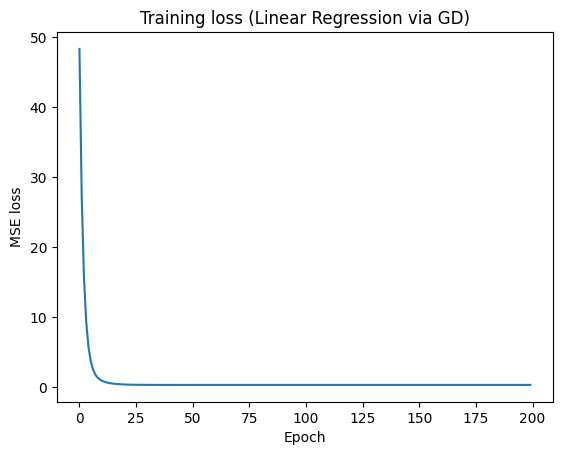

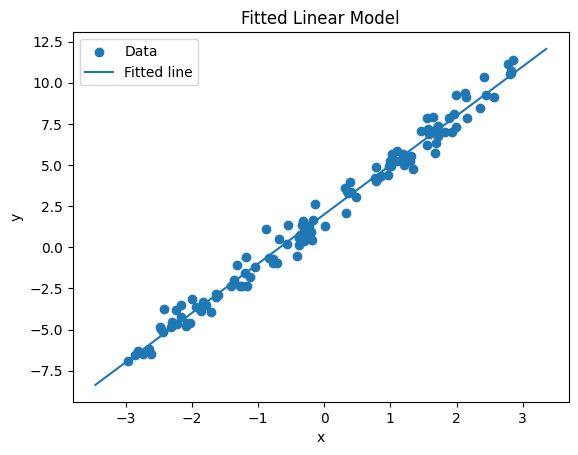

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Synthetic data: y = 3x + 2 + noise
rng = np.random.default_rng(42)
n = 120
X = rng.uniform(-3, 3, size=(n, 1))
true_w, true_b = 3.0, 2.0
noise = rng.normal(0, 0.6, size=(n, 1))
y = true_w * X + true_b + noise

# Initialize parameters
w = rng.normal(0, 1)
b = 0.0
eta = 0.05      # learning rate
epochs = 200
loss_history = []

for epoch in range(epochs):
    # Predictions
    y_hat = w * X + b

    # MSE loss
    loss = np.mean((y_hat - y)**2)
    loss_history.append(loss)

    # Gradients
    # d/dw MSE = (2/n) * sum( (y_hat - y) * x )
    # d/db MSE = (2/n) * sum( (y_hat - y) )
    grad_w = (2.0 / n) * np.sum((y_hat - y) * X)
    grad_b = (2.0 / n) * np.sum((y_hat - y))

    # Update
    w -= eta * grad_w
    b -= eta * grad_b

print("Learned parameters: w=%.3f, b=%.3f" % (w, b))

# Plot loss curve (each chart in its own figure)
plt.figure()
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("MSE loss")
plt.title("Training loss (Linear Regression via GD)")
plt.show()

# Plot data and fitted line (separate figure)
x_line = np.linspace(X.min()-0.5, X.max()+0.5, 200).reshape(-1, 1)
y_line = w * x_line + b

plt.figure()
plt.scatter(X, y, label="Data")
plt.plot(x_line, y_line, label="Fitted line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Fitted Linear Model")
plt.show()



## 4.6 Hands-On B: Logistic Regression (binary) with Scikit‑learn

This example selects two classes from the Iris dataset and fits a logistic regression classifier using default regularization. It prints accuracy and parameters.


Accuracy: 1.0

Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25


Coefficients (scaled feature space): [[1.9688772  1.89240859]]
Intercept: [0.30755204]


c:\Users\zeelp\anaconda3\envs\ml-gpu\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


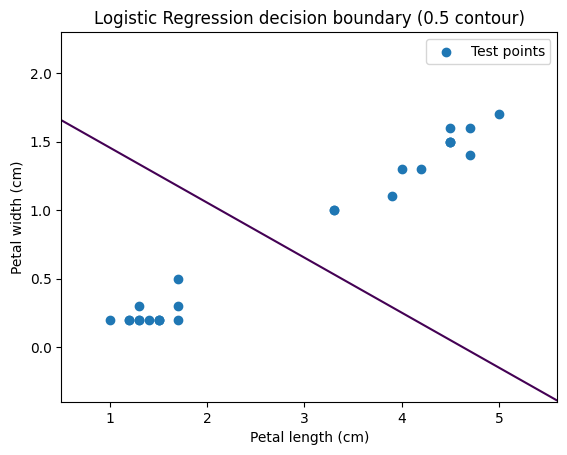

In [2]:

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load Iris and keep two classes to form a binary task (setosa vs. versicolor)
iris = load_iris()
X_all = pd.DataFrame(iris.data, columns=iris.feature_names)
y_all = iris.target

mask = (y_all == 0) | (y_all == 1)
X = X_all.loc[mask, ['petal length (cm)', 'petal width (cm)']]  # two informative features
y = y_all[mask]

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# Fit logistic regression (L2 regularization by default)
clf = LogisticRegression(max_iter=500)
clf.fit(X_train_s, y_train)

# Evaluate
y_pred = clf.predict(X_test_s)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred, target_names=iris.target_names[:2]))

print("\nCoefficients (scaled feature space):", clf.coef_)
print("Intercept:", clf.intercept_)

# Optional: visualize the decision boundary in feature space
# (No explicit colors set; default styles will be used.)
import numpy as np
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(
    np.linspace(X.iloc[:,0].min()-0.5, X.iloc[:,0].max()+0.5, 200),
    np.linspace(X.iloc[:,1].min()-0.5, X.iloc[:,1].max()+0.5, 200)
)

grid = np.c_[xx.ravel(), yy.ravel()]
grid_s = scaler.transform(grid)
probs = clf.predict_proba(grid_s)[:, 1].reshape(xx.shape)

plt.figure()
plt.contour(xx, yy, probs, levels=[0.5])
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], label="Test points")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Logistic Regression decision boundary (0.5 contour)")
plt.legend()
plt.show()



## 4.7 Summary

- Training minimizes an empirical risk (average loss) over the training set.  
- Loss functions quantify prediction error (MSE/MAE for regression; cross‑entropy for classification).  
- Regularization (L1/L2) penalizes parameter magnitude to reduce overfitting.  
- Gradient descent updates parameters using loss gradients; learning rate controls step size.  
- Hands‑on examples showed gradient‑based fitting for linear regression and a regularized logistic regression classifier.

